In [95]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['text.usetex'] = False

In [28]:
tre_market_share = 0.164
swedish_population = 10e6
urban_stockholm_population = 1e6

In [102]:
#urban area (stockholm)
pop_per_km_sthlm = 5000
bytes_per_year = 3000000e12 * tre_market_share
average_kbit_sec_busyhour = bytes_per_year * 8 / (365 * 8 * 60 * 60 * 1000)
average_kbit_sec_busyhour_per_person = average_kbit_sec_busyhour / swedish_population
kbit_sqrkm_sthlm = pop_per_km_sthlm * average_kbit_sec_busyhour_per_person

In [62]:
#rural area
pop_per_km_rural = 20
kbit_sqrkm_rural = pop_per_km_rural * average_kbit_sec_busyhour_per_person

<BarContainer object of 1 artists>

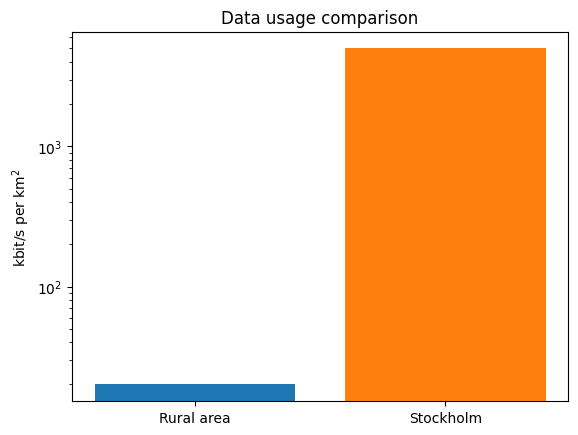

In [103]:
#plot
plt.title('Data usage comparison')
plt.yscale('log')
plt.ylabel(r'kbit/s per km$^2$')
plt.xticks(np.arange(2), ["Rural area", "Stockholm"])
plt.bar(0, pop_per_km_rural, label='Rural area')
plt.bar(1, pop_per_km_sthlm, label='Stockholm')